<h2><img src="./coding hive logo med with text.png" height="60" width ="47">  Coding A Neural Network 1: Image Classification</h2>

<h3>Step 1: Load the Libraries</h3>

In [1]:
import keras                               # deep learning package
from keras.datasets import mnist           # dataset we will use to train our model
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connectec layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt            # visualize images
from keras.preprocessing import image      # preprocess images
import tensorflow as tf                    # another way to obtain the data if keras link is not working

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<h3>Step 2: Obtain Data</h3>

In [2]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()  #load images into training and test datasets
#(train_x, train_y) , (test_x, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz') #backup method
train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel)
test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#look at the type of data stored in one image (there is 6000 of them!)
train_x[2,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<h3>Step 3: Reshape Data</h3>

In [5]:
train_x = train_x.reshape(60000,784)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,784)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
train_x[2] #view the content of one reshaped image. How is it different from before?


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h3>Step 4: Define Your Model</h3>

In [7]:
model = Sequential()                                               #explain sequential 
model.add(Dense(units=128,activation="relu",input_shape=(784,)))   #first layer
#reason behind units- 128 nodes
#input_shape- 28x28 was condensed to 784x1
model.add(Dense(units=128,activation="relu"))                      #second layer
model.add(Dense(units=128,activation="relu"))                      #third layer
model.add(Dense(units=10,activation="softmax"))                    #output layer
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


<h3>Step 5: Compile Your Model</h3>

In [8]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD?
#what is lr?
#what is loss?

<h3>Step 6: Fit Your Model</h3>

In [10]:
history=model.fit(train_x,train_y,batch_size=32,epochs=30,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples
#batch_size:   the number of training examples in one forward/backward pass
#verbose: display log on screen

Epoch 1/30
   32/60000 [..............................] - ETA: 18s - loss: 0.0831 - acc: 0.9688

  416/60000 [..............................] - ETA: 14s - loss: 0.1517 - acc: 0.9495

  736/60000 [..............................] - ETA: 16s - loss: 0.1578 - acc: 0.9457

 1184/60000 [..............................] - ETA: 14s - loss: 0.1781 - acc: 0.9451

 1568/60000 [..............................] - ETA: 13s - loss: 0.1690 - acc: 0.9458

 1632/60000 [..............................] - ETA: 14s - loss: 0.1701 - acc: 0.9455

 1984/60000 [..............................] - ETA: 13s - loss: 0.1669 - acc: 0.9461

 2112/60000 [>.............................] - ETA: 13s - loss: 0.1666 - acc: 0.9455

 2496/60000 [>.............................] - ETA: 13s - loss: 0.1697 - acc: 0.9459

 2912/60000 [>.............................] - ETA: 13s - loss: 0.1724 - acc: 0.9475

 3328/60000 [>.............................] - ETA: 13s - loss: 0.1695 - acc: 0.9477

 3680/60000 [>.............................] - ETA: 13s - loss: 0.1699 - acc: 0.9476

 3968/60000 [>.............................] - ETA: 13s - loss: 0.1720 - acc: 0.9473

 4096/60000 [=>............................] - ETA: 13s - loss: 0.1730 - acc: 0.9470

 4448/60000 [=>............................] - ETA: 13s - loss: 0.1742 - acc: 0.9465

 4864/60000 [=>............................] - ETA: 13s - loss: 0.1775 - acc: 0.9445

 5280/60000 [=>............................] - ETA: 13s - loss: 0.1759 - acc: 0.9455

 5600/60000 [=>............................] - ETA: 13s - loss: 0.1763 - acc: 0.9457

 5792/60000 [=>............................] - ETA: 13s - loss: 0.1769 - acc: 0.9451

 5920/60000 [=>............................] - ETA: 13s - loss: 0.1763 - acc: 0.9453

 6272/60000 [==>...........................] - ETA: 13s - loss: 0.1760 - acc: 0.9455

 6720/60000 [==>...........................] - ETA: 13s - loss: 0.1763 - acc: 0.9463

 7136/60000 [==>...........................] - ETA: 13s - loss: 0.1741 - acc: 0.9473

 7328/60000 [==>...........................] - ETA: 13s - loss: 0.1734 - acc: 0.9475

 7488/60000 [==>...........................] - ETA: 13s - loss: 0.1728 - acc: 0.9474

 7840/60000 [==>...........................] - ETA: 13s - loss: 0.1716 - acc: 0.9476

 8128/60000 [===>..........................] - ETA: 13s - loss: 0.1712 - acc: 0.9480

 8544/60000 [===>..........................] - ETA: 13s - loss: 0.1722 - acc: 0.9482

 8800/60000 [===>..........................] - ETA: 13s - loss: 0.1744 - acc: 0.9477

 8960/60000 [===>..........................] - ETA: 13s - loss: 0.1746 - acc: 0.9481

 9376/60000 [===>..........................] - ETA: 12s - loss: 0.1741 - acc: 0.9481



 9632/60000 [===>..........................] - ETA: 12s - loss: 0.1769 - acc: 0.9474



 9728/60000 [===>..........................] - ETA: 12s - loss: 0.1772 - acc: 0.9473

 9984/60000 [===>..........................] - ETA: 13s - loss: 0.1777 - acc: 0.9474

10240/60000 [====>.........................] - ETA: 12s - loss: 0.1783 - acc: 0.9472

10336/60000 [====>.........................] - ETA: 12s - loss: 0.1783 - acc: 0.9472

10688/60000 [====>.........................] - ETA: 12s - loss: 0.1801 - acc: 0.9469

10784/60000 [====>.........................] - ETA: 12s - loss: 0.1797 - acc: 0.9471

11072/60000 [====>.........................] - ETA: 12s - loss: 0.1797 - acc: 0.9473

11488/60000 [====>.........................] - ETA: 12s - loss: 0.1813 - acc: 0.9471

11872/60000 [====>.........................] - ETA: 12s - loss: 0.1832 - acc: 0.9467

11904/60000 [====>.........................] - ETA: 12s - loss: 0.1841 - acc: 0.9466

12224/60000 [=====>........................] - ETA: 12s - loss: 0.1843 - acc: 0.9465

12320/60000 [=====>........................] - ETA: 12s - loss: 0.1841 - acc: 0.9463

12704/60000 [=====>........................] - ETA: 12s - loss: 0.1829 - acc: 0.9468

13088/60000 [=====>........................] - ETA: 12s - loss: 0.1834 - acc: 0.9467

13184/60000 [=====>........................] - ETA: 12s - loss: 0.1837 - acc: 0.9468

13408/60000 [=====>........................] - ETA: 12s - loss: 0.1841 - acc: 0.9470

13728/60000 [=====>........................] - ETA: 11s - loss: 0.1836 - acc: 0.9473

13984/60000 [=====>........................] - ETA: 11s - loss: 0.1828 - acc: 0.9474

14432/60000 [======>.......................] - ETA: 11s - loss: 0.1822 - acc: 0.9478

14848/60000 [======>.......................] - ETA: 11s - loss: 0.1818 - acc: 0.9477

15200/60000 [======>.......................] - ETA: 11s - loss: 0.1822 - acc: 0.9474

15264/60000 [======>.......................] - ETA: 11s - loss: 0.1818 - acc: 0.9475

15360/60000 [======>.......................] - ETA: 11s - loss: 0.1823 - acc: 0.9473

15552/60000 [======>.......................] - ETA: 11s - loss: 0.1818 - acc: 0.9473

15776/60000 [======>.......................] - ETA: 11s - loss: 0.1818 - acc: 0.9473

15872/60000 [======>.......................] - ETA: 11s - loss: 0.1812 - acc: 0.9476

16288/60000 [=======>......................] - ETA: 11s - loss: 0.1811 - acc: 0.9473

16672/60000 [=======>......................] - ETA: 11s - loss: 0.1811 - acc: 0.9473

17184/60000 [=======>......................] - ETA: 11s - loss: 0.1821 - acc: 0.9468

17664/60000 [=======>......................] - ETA: 11s - loss: 0.1813 - acc: 0.9471

17984/60000 [=======>......................] - ETA: 10s - loss: 0.1810 - acc: 0.9470

18048/60000 [========>.....................] - ETA: 10s - loss: 0.1817 - acc: 0.9469

18240/60000 [========>.....................] - ETA: 10s - loss: 0.1816 - acc: 0.9471

…

57824/60000 [=========…

58016/60000 [============================>.] - ETA: 0s - loss: 0.1168 - acc: 0.9668

58496/60000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9668

58976/60000 [============================>.] - ETA: 0s - loss: 0.1170 - acc: 0.9667

59008/60000 [============================>.] - ETA: 0s - loss: 0.1170 - acc: 0.9667

59328/60000 [============================>.] - ETA: 0s - loss: 0.1169 - acc: 0.9667

59488/60000 [============================>.] - ETA: 0s - loss: 0.1169 - acc: 0.9667

59904/60000 [============================>.] - ETA: 0s - loss: 0.1169 - acc: 0.9667

60000/60000 [==============================] - 12s 201us/step - loss: 0.1168 - acc: 0.9668


Epoch 28/30
   32/60000 [..............................] - ETA: 13s - loss: 0.2359 - acc: 0.9375

  448/60000 [..............................] - ETA: 12s - loss: 0.1119 - acc: 0.9688

  704/60000 [..............................] - ETA: 12s - loss: 0.1249 - acc: 0.9645

  928/60000 [..............................] - ETA: 12s - loss: 0.1284 - acc: 0.9644

 1408/60000 [..............................] - ETA: 12s - loss: 0.1196 - acc: 0.9666

 1952/60000 [..............................] - ETA: 11s - loss: 0.1124 - acc: 0.9682

 2336/60000 [>.............................] - ETA: 11s - loss: 0.1079 - acc: 0.9692

 2464/60000 [>.............................] - ETA: 11s - loss: 0.1048 - acc: 0.9704

 2912/60000 [>.............................] - ETA: 10s - loss: 0.1072 - acc: 0.9681

 2976/60000 [>.............................] - ETA: 11s - loss: 0.1083 - acc: 0.9684

 3264/60000 [>.............................] - ETA: 11s - loss: 0.1078 - acc: 0.9684

 3456/60000 [>.............................] - ETA: 11s - loss: 0.1063 - acc: 0.9688

 3872/60000 [>.............................] - ETA: 11s - loss: 0.1047 - acc: 0.9695

 4288/60000 [=>............................] - ETA: 10s - loss: 0.1117 - acc: 0.9667

 4384/60000 [=>............................] - ETA: 11s - loss: 0.1121 - acc: 0.9667

 4800/60000 [=>............................] - ETA: 10s - loss: 0.1150 - acc: 0.9665

 4896/60000 [=>............................] - ETA: 11s - loss: 0.1137 - acc: 0.9667

 5312/60000 [=>............................] - ETA: 11s - loss: 0.1131 - acc: 0.9672

 5760/60000 [=>............................] - ETA: 10s - loss: 0.1179 - acc: 0.9668

 5856/60000 [=>............................] - ETA: 11s - loss: 0.1172 - acc: 0.9674

 6272/60000 [==>...........................] - ETA: 10s - loss: 0.1177 - acc: 0.9672

 6368/60000 [==>...........................] - ETA: 10s - loss: 0.1185 - acc: 0.9669

 6816/60000 [==>...........................] - ETA: 10s - loss: 0.1172 - acc: 0.9667

 7296/60000 [==>...........................] - ETA: 10s - loss: 0.1194 - acc: 0.9667

 7328/60000 [==>...........................] - ETA: 10s - loss: 0.1195 - acc: 0.9667

 7520/60000 [==>...........................] - ETA: 10s - loss: 0.1197 - acc: 0.9664

 7840/60000 [==>...........................] - ETA: 10s - loss: 0.1228 - acc: 0.9658

 8320/60000 [===>..........................] - ETA: 10s - loss: 0.1216 - acc: 0.9663

 8448/60000 [===>..........................] - ETA: 10s - loss: 0.1211 - acc: 0.9665

 8864/60000 [===>..........................] - ETA: 10s - loss: 0.1209 - acc: 0.9663

 9312/60000 [===>..........................] - ETA: 10s - loss: 0.1196 - acc: 0.9663

 9376/60000 [===>..........................] - ETA: 10s - loss: 0.1191 - acc: 0.9665

 9632/60000 [===>..........................] - ETA: 10s - loss: 0.1187 - acc: 0.9665

 9888/60000 [===>..........................] - ETA: 10s - loss: 0.1195 - acc: 0.9660

10336/60000 [====>.........................] - ETA: 10s - loss: 0.1198 - acc: 0.9661

10720/60000 [====>.........................] - ETA: 9s - loss: 0.1199 - acc: 0.9663 

10848/60000 [====>.........................] - ETA: 9s - loss: 0.1189 - acc: 0.9666

11136/60000 [====>.........................] - ETA: 9s - loss: 0.1181 - acc: 0.9665

11328/60000 [====>.........................] - ETA: 9s - loss: 0.1177 - acc: 0.9667

11552/60000 [====>.........................] - ETA: 9s - loss: 0.1187 - acc: 0.9664

11904/60000 [====>.........................] - ETA: 9s - loss: 0.1193 - acc: 0.9660

12192/60000 [=====>........................] - ETA: 9s - loss: 0.1187 - acc: 0.9662

12480/60000 [=====>........................] - ETA: 9s - loss: 0.1184 - acc: 0.9662

12832/60000 [=====>........................] - ETA: 9s - loss: 0.1167 - acc: 0.9669

13312/60000 [=====>........................] - ETA: 9s - loss: 0.1156 - acc: 0.9671

13376/60000 [=====>........................] - ETA: 9s - loss: 0.1157 - acc: 0.9670

13792/60000 [=====>........................] - ETA: 9s - loss: 0.1147 - acc: 0.9677

13856/60000 [=====>........................] - ETA: 9s - loss: 0.1147 - acc: 0.9677

14304/60000 [======>.......................] - ETA: 9s - loss: 0.1147 - acc: 0.9676

14432/60000 [======>.......................] - ETA: 9s - loss: 0.1148 - acc: 0.9674

14848/60000 [======>.......................] - ETA: 9s - loss: 0.1147 - acc: 0.9674

15232/60000 [======>.......................] - ETA: 8s - loss: 0.1143 - acc: 0.9676

15360/60000 [======>.......................] - ETA: 9s - loss: 0.1141 - acc: 0.9674



15872/60000 [======>.......................] - ETA: 8s - loss: 0.1161 - acc: 0.9669

16384/60000 [=======>......................] - ETA: 8s - loss: 0.1161 - acc: 0.9667

16960/60000 [=======>......................] - ETA: 8s - loss: 0.1162 - acc: 0.9668

17504/60000 [=======>......................] - ETA: 8s - loss: 0.1156 - acc: 0.9670

17856/60000 [=======>......................] - ETA: 8s - loss: 0.1147 - acc: 0.9672

18016/60000 [========>.....................] - ETA: 8s - loss: 0.1149 - acc: 0.9671

18496/60000 [========>.....................] - ETA: 8s - loss: 0.1142 - acc: 0.9673

19008/60000 [========>.....................] - ETA: 8s - loss: 0.1141 - acc: 0.9672

19040/60000 [========>.....................] - ETA: 8s - loss: 0.1141 - acc: 0.9672

19360/60000 [========>.....................] - ETA: 8s - loss: 0.1140 - acc: 0.9674

19552/60000 [========>.....................] - ETA: 8s - loss: 0.1155 - acc: 0.9672

19936/60000 [========>.....................] - ETA: 8s - loss: 0.1146 - acc: 0.9674

20320/60000 [=========>....................] - ETA: 7s - loss: 0.1155 - acc: 0.9672

20448/60000 [=========>....................] - ETA: 7s - loss: 0.1165 - acc: 0.9670

20896/60000 [=========>....................] - ETA: 7s - loss: 0.1163 - acc: 0.9670

21408/60000 [=========>....................] - ETA: 7s - loss: 0.1164 - acc: 0.9669

21952/60000 [=========>....................] - ETA: 7s - loss: 0.1177 - acc: 0.9665

22336/60000 [==========>...................] - ETA: 7s - loss: 0.1176 - acc: 0.9666

22496/60000 [==========>...................] - ETA: 7s - loss: 0.1172 - acc: 0.9667

22752/60000 [==========>...................] - ETA: 7s - loss: 0.1170 - acc: 0.9668

22976/60000 [==========>...................] - ETA: 7s - loss: 0.1172 - acc: 0.9668

23456/60000 [==========>...................] - ETA: 7s - loss: 0.1174 - acc: 0.9669

23968/60000 [==========>...................] - ETA: 7s - loss: 0.1174 - acc: 0.9668

24000/60000 [===========>..................] - ETA: 7s - loss: 0.1174 - acc: 0.9669

24512/60000 [===========>..................] - ETA: 7s - loss: 0.1179 - acc: 0.9666

24992/60000 [===========>..................] - ETA: 6s - loss: 0.1181 - acc: 0.9665

25024/60000 [===========>..................] - ETA: 6s - loss: 0.1181 - acc: 0.9665

25504/60000 [===========>..................] - ETA: 6s - loss: 0.1181 - acc: 0.9668

25984/60000 [===========>..................] - ETA: 6s - loss: 0.1183 - acc: 0.9667

26080/60000 [============>.................] - ETA: 6s - loss: 0.1186 - acc: 0.9666

26528/60000 [============>.................] - ETA: 6s - loss: 0.1182 - acc: 0.9666

26912/60000 [============>.................] - ETA: 6s - loss: 0.1182 - acc: 0.9664

27040/60000 [============>.................] - ETA: 6s - loss: 0.1178 - acc: 0.9666

27520/60000 [============>.................] - ETA: 6s - loss: 0.1177 - acc: 0.9666

27616/60000 [============>.................] - ETA: 6s - loss: 0.1178 - acc: 0.9666

27936/60000 [============>.................] - ETA: 6s - loss: 0.1175 - acc: 0.9666

28192/60000 [=============>................] - ETA: 6s - loss: 0.1175 - acc: 0.9665

28608/60000 [=============>................] - ETA: 6s - loss: 0.1169 - acc: 0.9667

29152/60000 [=============>................] - ETA: 6s - loss: 0.1174 - acc: 0.9667

29184/60000 [=============>................] - ETA: 6s - loss: 0.1174 - acc: 0.9667

29664/60000 [=============>................] - ETA: 6s - loss: 0.1173 - acc: 0.9667

30144/60000 [==============>...............] - ETA: 5s - loss: 0.1166 - acc: 0.9669

30208/60000 [==============>...............] - ETA: 5s - loss: 0.1167 - acc: 0.9669

30688/60000 [==============>...............] - ETA: 5s - loss: 0.1163 - acc: 0.9670

31136/60000 [==============>...............] - ETA: 5s - loss: 0.1162 - acc: 0.9670

31232/60000 [==============>...............] - ETA: 5s - loss: 0.1162 - acc: 0.9669

31648/60000 [==============>...............] - ETA: 5s - loss: 0.1168 - acc: 0.9667

31808/60000 [==============>...............] - ETA: 5s - loss: 0.1165 - acc: 0.9668

32256/60000 [===============>..............] - ETA: 5s - loss: 0.1164 - acc: 0.9669

32768/60000 [===============>..............] - ETA: 5s - loss: 0.1163 - acc: 0.9670

33248/60000 [===============>..............] - ETA: 5s - loss: 0.1165 - acc: 0.9669

33312/60000 [===============>..............] - ETA: 5s - loss: 0.1166 - acc: 0.9669

33824/60000 [===============>..............] - ETA: 5s - loss: 0.1163 - acc: 0.9669

34336/60000 [================>.............] - ETA: 5s - loss: 0.1163 - acc: 0.9668

34816/60000 [================>.............] - ETA: 4s - loss: 0.1165 - acc: 0.9667

35040/60000 [================>.............] - ETA: 4s - loss: 0.1163 - acc: 0.9667

35200/60000 [================>.............] - ETA: 4s - loss: 0.1162 - acc: 0.9667

35584/60000 [================>.............] - ETA: 4s - loss: 0.1159 - acc: 0.9668

35808/60000 [================>.............] - ETA: 4s - loss: 0.1160 - acc: 0.9668

36192/60000 [=================>............] - ETA: 4s - loss: 0.1161 - acc: 0.9668

36704/60000 [=================>............] - ETA: 4s - loss: 0.1165 - acc: 0.9667

37216/60000 [=================>............] - ETA: 4s - loss: 0.1162 - acc: 0.9668

37664/60000 [=================>............] - ETA: 4s - loss: 0.1157 - acc: 0.9669

37760/60000 [=================>............] - ETA: 4s - loss: 0.1159 - acc: 0.9669

38208/60000 [==================>...........] - ETA: 4s - loss: 0.1161 - acc: 0.9669

38688/60000 [==================>...........] - ETA: 4s - loss: 0.1159 - acc: 0.9670

38752/60000 [==================>...........] - ETA: 4s - loss: 0.1159 - acc: 0.9670

39168/60000 [==================>...........] - ETA: 4s - loss: 0.1161 - acc: 0.9668

39712/60000 [==================>...........] - ETA: 4s - loss: 0.1159 - acc: 0.9668

40224/60000 [===================>..........] - ETA: 3s - loss: 0.1164 - acc: 0.9666

40736/60000 [===================>..........] - ETA: 3s - loss: 0.1161 - acc: 0.9668

40800/60000 [===================>..........] - ETA: 3s - loss: 0.1164 - acc: 0.9668

41280/60000 [===================>..........] - ETA: 3s - loss: 0.1160 - acc: 0.9670

41824/60000 [===================>..........] - ETA: 3s - loss: 0.1156 - acc: 0.9673

42368/60000 [====================>.........] - ETA: 3s - loss: 0.1155 - acc: 0.9674

42880/60000 [====================>.........] - ETA: 3s - loss: 0.1158 - acc: 0.9674

43424/60000 [====================>.........] - ETA: 3s - loss: 0.1158 - acc: 0.9673

43936/60000 [====================>.........] - ETA: 3s - loss: 0.1157 - acc: 0.9674

44000/60000 [=====================>........] - ETA: 3s - loss: 0.1156 - acc: 0.9675

44480/60000 [=====================>........] - ETA: 3s - loss: 0.1154 - acc: 0.9675

44992/60000 [=====================>........] - ETA: 3s - loss: 0.1155 - acc: 0.9675

45472/60000 [=====================>........] - ETA: 2s - loss: 0.1156 - acc: 0.9675



45504/60000 [=====================>........] - ETA: 2s - loss: 0.1156 - acc: 0.9675

45920/60000 [=====================>........] - ETA: 2s - loss: 0.1159 - acc: 0.9675

46016/60000 [======================>.......] - ETA: 2s - loss: 0.1159 - acc: 0.9675

46496/60000 [======================>.......] - ETA: 2s - loss: 0.1158 - acc: 0.9676

47008/60000 [======================>.......] - ETA: 2s - loss: 0.1157 - acc: 0.9676

47552/60000 [======================>.......] - ETA: 2s - loss: 0.1152 - acc: 0.9678

48064/60000 [=======================>......] - ETA: 2s - loss: 0.1154 - acc: 0.9677

48576/60000 [=======================>......] - ETA: 2s - loss: 0.1153 - acc: 0.9677

49088/60000 [=======================>......] - ETA: 2s - loss: 0.1157 - acc: 0.9675

49504/60000 [=======================>......] - ETA: 2s - loss: 0.1159 - acc: 0.9675

49600/60000 [=======================>......] - ETA: 2s - loss: 0.1162 - acc: 0.9674

50080/60000 [========================>.....] - ETA: 1s - loss: 0.1161 - acc: 0.9674

50112/60000 [========================>.....] - ETA: 1s - loss: 0.1161 - acc: 0.9674

50464/60000 [========================>.....] - ETA: 1s - loss: 0.1161 - acc: 0.9674

50592/60000 [========================>.....] - ETA: 1s - loss: 0.1159 - acc: 0.9674

51040/60000 [========================>.....] - ETA: 1s - loss: 0.1159 - acc: 0.9674

51584/60000 [========================>.....] - ETA: 1s - loss: 0.1159 - acc: 0.9672

52096/60000 [=========================>....] - ETA: 1s - loss: 0.1160 - acc: 0.9672

52128/60000 [=========================>....] - ETA: 1s - loss: 0.1160 - acc: 0.9672

52608/60000 [=========================>....] - ETA: 1s - loss: 0.1158 - acc: 0.9672

53056/60000 [=========================>....] - ETA: 1s - loss: 0.1160 - acc: 0.9672

53120/60000 [=========================>....] - ETA: 1s - loss: 0.1161 - acc: 0.9672

53440/60000 [=========================>....] - ETA: 1s - loss: 0.1159 - acc: 0.9673

53664/60000 [=========================>....] - ETA: 1s - loss: 0.1158 - acc: 0.9673

53888/60000 [=========================>....] - ETA: 1s - loss: 0.1157 - acc: 0.9673

54240/60000 [==========================>...] - ETA: 1s - loss: 0.1161 - acc: 0.9673

54624/60000 [==========================>...] - ETA: 1s - loss: 0.1163 - acc: 0.9672

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1164 - acc: 0.9671

55168/60000 [==========================>...] - ETA: 0s - loss: 0.1166 - acc: 0.9670

55584/60000 [==========================>...] - ETA: 0s - loss: 0.1166 - acc: 0.9670

55680/60000 [==========================>...] - ETA: 0s - loss: 0.1166 - acc: 0.9670

56128/60000 [===========================>..] - ETA: 0s - loss: 0.1167 - acc: 0.9670

56544/60000 [===========================>..] - ETA: 0s - loss: 0.1165 - acc: 0.9671

56672/60000 [===========================>..] - ETA: 0s - loss: 0.1164 - acc: 0.9671

57120/60000 [===========================>..] - ETA: 0s - loss: 0.1162 - acc: 0.9673

57184/60000 [===========================>..] - ETA: 0s - loss: 0.1161 - acc: 0.9673

57568/60000 [===========================>..] - ETA: 0s - loss: 0.1165 - acc: 0.9672

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1165 - acc: 0.9673

58112/60000 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9673

58304/60000 [============================>.] - ETA: 0s - loss: 0.1161 - acc: 0.9674

58688/60000 [============================>.] - ETA: 0s - loss: 0.1158 - acc: 0.9674

59104/60000 [============================>.] - ETA: 0s - loss: 0.1157 - acc: 0.9674

59200/60000 [============================>.] - ETA: 0s - loss: 0.1157 - acc: 0.9674

59584/60000 [============================>.] - ETA: 0s - loss: 0.1154 - acc: 0.9675

59744/60000 [============================>.] - ETA: 0s - loss: 0.1155 - acc: 0.9675

60000/60000 [==============================] - 12s 199us/step - loss: 0.1154 - acc: 0.9676


Epoch 29/30
   32/60000 [..............................] - ETA: 18s - loss: 0.0666 - acc: 1.0000

   96/60000 [..............................] - ETA: 38s - loss: 0.1032 - acc: 0.9688

  576/60000 [..............................] - ETA: 11s - loss: 0.0817 - acc: 0.9792

  640/60000 [..............................] - ETA: 15s - loss: 0.0879 - acc: 0.9750

 1088/60000 [..............................] - ETA: 11s - loss: 0.1036 - acc: 0.9660

 1152/60000 [..............................] - ETA: 13s - loss: 0.1026 - acc: 0.9679

 1312/60000 [..............................] - ETA: 14s - loss: 0.1038 - acc: 0.9665

 1504/60000 [..............................] - ETA: 14s - loss: 0.1081 - acc: 0.9668

 1760/60000 [..............................] - ETA: 14s - loss: 0.1065 - acc: 0.9676

 1984/60000 [..............................] - ETA: 13s - loss: 0.1130 - acc: 0.9647

 2240/60000 [>.............................] - ETA: 13s - loss: 0.1080 - acc: 0.9661

 2464/60000 [>.............................] - ETA: 13s - loss: 0.1094 - acc: 0.9663

 2688/60000 [>.............................] - ETA: 13s - loss: 0.1089 - acc: 0.9658

 3008/60000 [>.............................] - ETA: 13s - loss: 0.1112 - acc: 0.9648

 3264/60000 [>.............................] - ETA: 13s - loss: 0.1112 - acc: 0.9654

 3584/60000 [>.............................] - ETA: 12s - loss: 0.1105 - acc: 0.9657

 3712/60000 [>.............................] - ETA: 13s - loss: 0.1137 - acc: 0.9655

 4128/60000 [=>............................] - ETA: 12s - loss: 0.1148 - acc: 0.9656

 4256/60000 [=>............................] - ETA: 12s - loss: 0.1140 - acc: 0.9664

 4704/60000 [=>............................] - ETA: 12s - loss: 0.1158 - acc: 0.9651

 5056/60000 [=>............................] - ETA: 12s - loss: 0.1142 - acc: 0.9662

 5184/60000 [=>............................] - ETA: 12s - loss: 0.1148 - acc: 0.9659

 5440/60000 [=>............................] - ETA: 12s - loss: 0.1123 - acc: 0.9667

 5696/60000 [=>............................] - ETA: 12s - loss: 0.1136 - acc: 0.9670

 5984/60000 [=>............................] - ETA: 12s - loss: 0.1118 - acc: 0.9679

 6144/60000 [==>...........................] - ETA: 12s - loss: 0.1103 - acc: 0.9686

 6304/60000 [==>...........................] - ETA: 12s - loss: 0.1101 - acc: 0.9688

 6656/60000 [==>...........................] - ETA: 11s - loss: 0.1099 - acc: 0.9684

 6912/60000 [==>...........................] - ETA: 11s - loss: 0.1092 - acc: 0.9688

 7296/60000 [==>...........................] - ETA: 11s - loss: 0.1096 - acc: 0.9690

 7456/60000 [==>...........................] - ETA: 11s - loss: 0.1083 - acc: 0.9694

 7840/60000 [==>...........................] - ETA: 11s - loss: 0.1090 - acc: 0.9690

 7936/60000 [==>...........................] - ETA: 11s - loss: 0.1086 - acc: 0.9693

 8352/60000 [===>..........................] - ETA: 11s - loss: 0.1109 - acc: 0.9688

 8832/60000 [===>..........................] - ETA: 11s - loss: 0.1105 - acc: 0.9692

 8896/60000 [===>..........................] - ETA: 11s - loss: 0.1101 - acc: 0.9693

 9344/60000 [===>..........................] - ETA: 10s - loss: 0.1107 - acc: 0.9692

 9440/60000 [===>..........................] - ETA: 11s - loss: 0.1108 - acc: 0.9693

 9856/60000 [===>..........................] - ETA: 11s - loss: 0.1118 - acc: 0.9689

10304/60000 [====>.........................] - ETA: 10s - loss: 0.1112 - acc: 0.9688

10400/60000 [====>.........................] - ETA: 10s - loss: 0.1133 - acc: 0.9683

10816/60000 [====>.........................] - ETA: 10s - loss: 0.1124 - acc: 0.9684

11200/60000 [====>.........................] - ETA: 10s - loss: 0.1147 - acc: 0.9680

11328/60000 [====>.........................] - ETA: 10s - loss: 0.1144 - acc: 0.9680

11712/60000 [====>.........................] - ETA: 10s - loss: 0.1147 - acc: 0.9679

11840/60000 [====>.........................] - ETA: 10s - loss: 0.1150 - acc: 0.9679

12192/60000 [=====>........................] - ETA: 10s - loss: 0.1154 - acc: 0.9676

12352/60000 [=====>........................] - ETA: 10s - loss: 0.1157 - acc: 0.9676

12768/60000 [=====>........................] - ETA: 10s - loss: 0.1156 - acc: 0.9679

12928/60000 [=====>........................] - ETA: 10s - loss: 0.1152 - acc: 0.9679

13280/60000 [=====>........................] - ETA: 10s - loss: 0.1146 - acc: 0.9679

13664/60000 [=====>........................] - ETA: 9s - loss: 0.1145 - acc: 0.9679 

13824/60000 [=====>........................] - ETA: 9s - loss: 0.1138 - acc: 0.9681

14272/60000 [======>.......................] - ETA: 9s - loss: 0.1149 - acc: 0.9676

14368/60000 [======>.......................] - ETA: 9s - loss: 0.1148 - acc: 0.9676

14816/60000 [======>.......................] - ETA: 9s - loss: 0.1158 - acc: 0.9673

15264/60000 [======>.......................] - ETA: 9s - loss: 0.1160 - acc: 0.9670

15328/60000 [======>.......................] - ETA: 9s - loss: 0.1156 - acc: 0.9672

15712/60000 [======>.......................] - ETA: 9s - loss: 0.1157 - acc: 0.9675

15808/60000 [======>.......................] - ETA: 9s - loss: 0.1159 - acc: 0.9675

16256/60000 [=======>......................] - ETA: 9s - loss: 0.1160 - acc: 0.9672

16352/60000 [=======>......................] - ETA: 9s - loss: 0.1159 - acc: 0.9672

16832/60000 [=======>......................] - ETA: 9s - loss: 0.1153 - acc: 0.9674

17056/60000 [=======>......................] - ETA: 9s - loss: 0.1153 - acc: 0.9675

17280/60000 [=======>......................] - ETA: 9s - loss: 0.1154 - acc: 0.9674

17696/60000 [=======>......................] - ETA: 8s - loss: 0.1154 - acc: 0.9675

17824/60000 [=======>......................] - ETA: 8s - loss: 0.1162 - acc: 0.9672

18176/60000 [========>.....................] - ETA: 8s - loss: 0.1167 - acc: 0.9670

18304/60000 [========>.....................] - ETA: 8s - loss: 0.1167 - acc: 0.9669

18624/60000 [========>.....................] - ETA: 8s - loss: 0.1163 - acc: 0.9671

18784/60000 [========>.....................] - ETA: 8s - loss: 0.1161 - acc: 0.9672

19136/60000 [========>.....................] - ETA: 8s - loss: 0.1161 - acc: 0.9672

19520/60000 [========>.....................] - ETA: 8s - loss: 0.1155 - acc: 0.9675

19648/60000 [========>.....................] - ETA: 8s - loss: 0.1154 - acc: 0.9677

20128/60000 [=========>....................] - ETA: 8s - loss: 0.1152 - acc: 0.9678

20256/60000 [=========>....................] - ETA: 8s - loss: 0.1154 - acc: 0.9678

20608/60000 [=========>....................] - ETA: 8s - loss: 0.1155 - acc: 0.9677

20768/60000 [=========>....................] - ETA: 8s - loss: 0.1151 - acc: 0.9677

21184/60000 [=========>....................] - ETA: 8s - loss: 0.1155 - acc: 0.9677

21344/60000 [=========>....................] - ETA: 8s - loss: 0.1156 - acc: 0.9676

21728/60000 [=========>....................] - ETA: 8s - loss: 0.1149 - acc: 0.9679

22080/60000 [==========>...................] - ETA: 7s - loss: 0.1147 - acc: 0.9680

22240/60000 [==========>...................] - ETA: 7s - loss: 0.1146 - acc: 0.9681

22656/60000 [==========>...................] - ETA: 7s - loss: 0.1153 - acc: 0.9678

22784/60000 [==========>...................] - ETA: 7s - loss: 0.1153 - acc: 0.9678

23264/60000 [==========>...................] - ETA: 7s - loss: 0.1151 - acc: 0.9678

23680/60000 [==========>...................] - ETA: 7s - loss: 0.1149 - acc: 0.9678

23808/60000 [==========>...................] - ETA: 7s - loss: 0.1154 - acc: 0.9678

24288/60000 [===========>..................] - ETA: 7s - loss: 0.1150 - acc: 0.9676

24672/60000 [===========>..................] - ETA: 7s - loss: 0.1149 - acc: 0.9677

24832/60000 [===========>..................] - ETA: 7s - loss: 0.1148 - acc: 0.9677

25280/60000 [===========>..................] - ETA: 7s - loss: 0.1143 - acc: 0.9678

25408/60000 [===========>..................] - ETA: 7s - loss: 0.1141 - acc: 0.9678

25856/60000 [===========>..................] - ETA: 7s - loss: 0.1138 - acc: 0.9679

25952/60000 [===========>..................] - ETA: 7s - loss: 0.1141 - acc: 0.9678

26368/60000 [============>.................] - ETA: 6s - loss: 0.1139 - acc: 0.9678

26496/60000 [============>.................] - ETA: 6s - loss: 0.1139 - acc: 0.9678

26944/60000 [============>.................] - ETA: 6s - loss: 0.1139 - acc: 0.9679

27136/60000 [============>.................] - ETA: 6s - loss: 0.1139 - acc: 0.9678

27424/60000 [============>.................] - ETA: 6s - loss: 0.1136 - acc: 0.9679

27680/60000 [============>.................] - ETA: 6s - loss: 0.1136 - acc: 0.9679

28032/60000 [=============>................] - ETA: 6s - loss: 0.1132 - acc: 0.9680

28544/60000 [=============>................] - ETA: 6s - loss: 0.1132 - acc: 0.9680

28672/60000 [=============>................] - ETA: 6s - loss: 0.1132 - acc: 0.9680

29024/60000 [=============>................] - ETA: 6s - loss: 0.1127 - acc: 0.9681

29152/60000 [=============>................] - ETA: 6s - loss: 0.1127 - acc: 0.9681

29536/60000 [=============>................] - ETA: 6s - loss: 0.1128 - acc: 0.9681

29696/60000 [=============>................] - ETA: 6s - loss: 0.1127 - acc: 0.9681

30080/60000 [==============>...............] - ETA: 6s - loss: 0.1125 - acc: 0.9681

30240/60000 [==============>...............] - ETA: 6s - loss: 0.1128 - acc: 0.9679

30592/60000 [==============>...............] - ETA: 6s - loss: 0.1128 - acc: 0.9679

30976/60000 [==============>...............] - ETA: 5s - loss: 0.1125 - acc: 0.9680

31072/60000 [==============>...............] - ETA: 5s - loss: 0.1126 - acc: 0.9680

31520/60000 [==============>...............] - ETA: 5s - loss: 0.1127 - acc: 0.9680

31680/60000 [==============>...............] - ETA: 5s - loss: 0.1129 - acc: 0.9680

32096/60000 [===============>..............] - ETA: 5s - loss: 0.1137 - acc: 0.9679

32192/60000 [===============>..............] - ETA: 5s - loss: 0.1136 - acc: 0.9679

32576/60000 [===============>..............] - ETA: 5s - loss: 0.1134 - acc: 0.9680

32768/60000 [===============>..............] - ETA: 5s - loss: 0.1134 - acc: 0.9679

33088/60000 [===============>..............] - ETA: 5s - loss: 0.1135 - acc: 0.9679

33568/60000 [===============>..............] - ETA: 5s - loss: 0.1129 - acc: 0.9680

33952/60000 [===============>..............] - ETA: 5s - loss: 0.1127 - acc: 0.9681

34080/60000 [================>.............] - ETA: 5s - loss: 0.1128 - acc: 0.9681

34464/60000 [================>.............] - ETA: 5s - loss: 0.1130 - acc: 0.9680

34624/60000 [================>.............] - ETA: 5s - loss: 0.1128 - acc: 0.9681

34976/60000 [================>.............] - ETA: 5s - loss: 0.1131 - acc: 0.9680

35136/60000 [================>.............] - ETA: 5s - loss: 0.1134 - acc: 0.9680

35552/60000 [================>.............] - ETA: 4s - loss: 0.1133 - acc: 0.9679

36000/60000 [=================>............] - ETA: 4s - loss: 0.1133 - acc: 0.9679

36128/60000 [=================>............] - ETA: 4s - loss: 0.1132 - acc: 0.9679

36576/60000 [=================>............] - ETA: 4s - loss: 0.1131 - acc: 0.9679

36640/60000 [=================>............] - ETA: 4s - loss: 0.1131 - acc: 0.9679

37088/60000 [=================>............] - ETA: 4s - loss: 0.1133 - acc: 0.9679

37248/60000 [=================>............] - ETA: 4s - loss: 0.1132 - acc: 0.9679

37472/60000 [=================>............] - ETA: 4s - loss: 0.1135 - acc: 0.9678

37760/60000 [=================>............] - ETA: 4s - loss: 0.1135 - acc: 0.9678

38080/60000 [==================>...........] - ETA: 4s - loss: 0.1132 - acc: 0.9679

38336/60000 [==================>...........] - ETA: 4s - loss: 0.1137 - acc: 0.9678

38624/60000 [==================>...........] - ETA: 4s - loss: 0.1139 - acc: 0.9677

38944/60000 [==================>...........] - ETA: 4s - loss: 0.1141 - acc: 0.9676

39104/60000 [==================>...........] - ETA: 4s - loss: 0.1141 - acc: 0.9675

39488/60000 [==================>...........] - ETA: 4s - loss: 0.1140 - acc: 0.9675

39616/60000 [==================>...........] - ETA: 4s - loss: 0.1140 - acc: 0.9676

40000/60000 [===================>..........] - ETA: 4s - loss: 0.1139 - acc: 0.9675

40192/60000 [===================>..........] - ETA: 4s - loss: 0.1142 - acc: 0.9674

40608/60000 [===================>..........] - ETA: 3s - loss: 0.1140 - acc: 0.9675

41056/60000 [===================>..........] - ETA: 3s - loss: 0.1140 - acc: 0.9674

41184/60000 [===================>..........] - ETA: 3s - loss: 0.1140 - acc: 0.9674

41600/60000 [===================>..........] - ETA: 3s - loss: 0.1141 - acc: 0.9674

41696/60000 [===================>..........] - ETA: 3s - loss: 0.1142 - acc: 0.9674

41984/60000 [===================>..........] - ETA: 3s - loss: 0.1141 - acc: 0.9675

42272/60000 [====================>.........] - ETA: 3s - loss: 0.1141 - acc: 0.9675

42560/60000 [====================>.........] - ETA: 3s - loss: 0.1139 - acc: 0.9676

42880/60000 [====================>.........] - ETA: 3s - loss: 0.1140 - acc: 0.9676

43296/60000 [====================>.........] - ETA: 3s - loss: 0.1138 - acc: 0.9676

43584/60000 [====================>.........] - ETA: 3s - loss: 0.1139 - acc: 0.9676

43840/60000 [====================>.........] - ETA: 3s - loss: 0.1139 - acc: 0.9675

44288/60000 [=====================>........] - ETA: 3s - loss: 0.1141 - acc: 0.9675

44384/60000 [=====================>........] - ETA: 3s - loss: 0.1140 - acc: 0.9676

44736/60000 [=====================>........] - ETA: 3s - loss: 0.1142 - acc: 0.9676

44928/60000 [=====================>........] - ETA: 3s - loss: 0.1141 - acc: 0.9675

45248/60000 [=====================>........] - ETA: 2s - loss: 0.1141 - acc: 0.9675

45408/60000 [=====================>........] - ETA: 2s - loss: 0.1140 - acc: 0.9676

45728/60000 [=====================>........] - ETA: 2s - loss: 0.1144 - acc: 0.9675

46176/60000 [======================>.......] - ETA: 2s - loss: 0.1147 - acc: 0.9675

46336/60000 [======================>.......] - ETA: 2s - loss: 0.1147 - acc: 0.9675

46816/60000 [======================>.......] - ETA: 2s - loss: 0.1147 - acc: 0.9676

47232/60000 [======================>.......] - ETA: 2s - loss: 0.1147 - acc: 0.9676

47360/60000 [======================>.......] - ETA: 2s - loss: 0.1146 - acc: 0.9677

47648/60000 [======================>.......] - ETA: 2s - loss: 0.1143 - acc: 0.9678

47936/60000 [======================>.......] - ETA: 2s - loss: 0.1140 - acc: 0.9678

48224/60000 [=======================>......] - ETA: 2s - loss: 0.1141 - acc: 0.9678

48480/60000 [=======================>......] - ETA: 2s - loss: 0.1140 - acc: 0.9678

48768/60000 [=======================>......] - ETA: 2s - loss: 0.1142 - acc: 0.9678

48928/60000 [=======================>......] - ETA: 2s - loss: 0.1139 - acc: 0.9679

49312/60000 [=======================>......] - ETA: 2s - loss: 0.1139 - acc: 0.9679

49696/60000 [=======================>......] - ETA: 2s - loss: 0.1142 - acc: 0.9678

49792/60000 [=======================>......] - ETA: 2s - loss: 0.1141 - acc: 0.9679

50144/60000 [========================>.....] - ETA: 1s - loss: 0.1140 - acc: 0.9679

50272/60000 [========================>.....] - ETA: 1s - loss: 0.1140 - acc: 0.9679

50464/60000 [========================>.....] - ETA: 1s - loss: 0.1141 - acc: 0.9679

50688/60000 [========================>.....] - ETA: 1s - loss: 0.1140 - acc: 0.9679

50976/60000 [========================>.....] - ETA: 1s - loss: 0.1140 - acc: 0.9679

51200/60000 [========================>.....] - ETA: 1s - loss: 0.1140 - acc: 0.9679

51456/60000 [========================>.....] - ETA: 1s - loss: 0.1137 - acc: 0.9680

51680/60000 [========================>.....] - ETA: 1s - loss: 0.1136 - acc: 0.9680

51936/60000 [========================>.....] - ETA: 1s - loss: 0.1135 - acc: 0.9681

52192/60000 [=========================>....] - ETA: 1s - loss: 0.1135 - acc: 0.9680

52448/60000 [=========================>....] - ETA: 1s - loss: 0.1133 - acc: 0.9681

52768/60000 [=========================>....] - ETA: 1s - loss: 0.1132 - acc: 0.9681

53088/60000 [=========================>....] - ETA: 1s - loss: 0.1133 - acc: 0.9681

53504/60000 [=========================>....] - ETA: 1s - loss: 0.1132 - acc: 0.9681

53632/60000 [=========================>....] - ETA: 1s - loss: 0.1133 - acc: 0.9681

53984/60000 [=========================>....] - ETA: 1s - loss: 0.1134 - acc: 0.9680

54144/60000 [==========================>...] - ETA: 1s - loss: 0.1134 - acc: 0.9680

54592/60000 [==========================>...] - ETA: 1s - loss: 0.1134 - acc: 0.9680

54816/60000 [==========================>...] - ETA: 1s - loss: 0.1134 - acc: 0.9680



55040/60000 [==========================>...] - ETA: 1s - loss: 0.1134 - acc: 0.9680

55360/60000 [==========================>...] - ETA: 0s - loss: 0.1133 - acc: 0.9680

55616/60000 [==========================>...] - ETA: 0s - loss: 0.1132 - acc: 0.9680

55968/60000 [==========================>...] - ETA: 0s - loss: 0.1134 - acc: 0.9680

56128/60000 [===========================>..] - ETA: 0s - loss: 0.1134 - acc: 0.9680

56544/60000 [===========================>..] - ETA: 0s - loss: 0.1135 - acc: 0.9680

56864/60000 [===========================>..] - ETA: 0s - loss: 0.1136 - acc: 0.9679

56992/60000 [===========================>..] - ETA: 0s - loss: 0.1137 - acc: 0.9679

57152/60000 [===========================>..] - ETA: 0s - loss: 0.1137 - acc: 0.9679

57440/60000 [===========================>..] - ETA: 0s - loss: 0.1135 - acc: 0.9679

57728/60000 [===========================>..] - ETA: 0s - loss: 0.1134 - acc: 0.9680

58016/60000 [============================>.] - ETA: 0s - loss: 0.1134 - acc: 0.9680

58304/60000 [============================>.] - ETA: 0s - loss: 0.1137 - acc: 0.9679

58432/60000 [============================>.] - ETA: 0s - loss: 0.1137 - acc: 0.9679

58688/60000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9678

58880/60000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9678

59072/60000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9678

59296/60000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9678

59584/60000 [============================>.] - ETA: 0s - loss: 0.1139 - acc: 0.9679

59776/60000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9679

59936/60000 [============================>.] - ETA: 0s - loss: 0.1138 - acc: 0.9679

60000/60000 [==============================] - 12s 205us/step - loss: 0.1137 - acc: 0.9679


Epoch 30/30
   32/60000 [..............................] - ETA: 14s - loss: 0.1544 - acc: 0.9375

  384/60000 [..............................] - ETA: 9s - loss: 0.1232 - acc: 0.9583 

  704/60000 [..............................] - ETA: 9s - loss: 0.1176 - acc: 0.9645

  896/60000 [..............................] - ETA: 10s - loss: 0.1048 - acc: 0.9688

 1120/60000 [..............................] - ETA: 11s - loss: 0.0974 - acc: 0.9732

 1440/60000 [..............................] - ETA: 10s - loss: 0.0984 - acc: 0.9708

 1728/60000 [..............................] - ETA: 10s - loss: 0.1091 - acc: 0.9705

 1952/60000 [..............................] - ETA: 11s - loss: 0.1110 - acc: 0.9713

 2240/60000 [>.............................] - ETA: 11s - loss: 0.1056 - acc: 0.9719

 2464/60000 [>.............................] - ETA: 11s - loss: 0.1043 - acc: 0.9728

 2656/60000 [>.............................] - ETA: 11s - loss: 0.1015 - acc: 0.9736

 2976/60000 [>.............................] - ETA: 11s - loss: 0.1059 - acc: 0.9735

 3328/60000 [>.............................] - ETA: 10s - loss: 0.1027 - acc: 0.9739

 3552/60000 [>.............................] - ETA: 10s - loss: 0.1044 - acc: 0.9733

 3808/60000 [>.............................] - ETA: 10s - loss: 0.1033 - acc: 0.9732

 4000/60000 [=>............................] - ETA: 11s - loss: 0.1022 - acc: 0.9738

 4224/60000 [=>............................] - ETA: 11s - loss: 0.1020 - acc: 0.9740

 4448/60000 [=>............................] - ETA: 11s - loss: 0.1006 - acc: 0.9741

 4672/60000 [=>............................] - ETA: 11s - loss: 0.1018 - acc: 0.9745

 4896/60000 [=>............................] - ETA: 11s - loss: 0.1044 - acc: 0.9741

 5120/60000 [=>............................] - ETA: 11s - loss: 0.1050 - acc: 0.9736

 5216/60000 [=>............................] - ETA: 11s - loss: 0.1047 - acc: 0.9737

 5376/60000 [=>............................] - ETA: 11s - loss: 0.1045 - acc: 0.9736

 5632/60000 [=>............................] - ETA: 11s - loss: 0.1057 - acc: 0.9730

 5824/60000 [=>............................] - ETA: 11s - loss: 0.1040 - acc: 0.9736

 6016/60000 [==>...........................] - ETA: 12s - loss: 0.1062 - acc: 0.9729

 6176/60000 [==>...........................] - ETA: 12s - loss: 0.1053 - acc: 0.9731

 6336/60000 [==>...........................] - ETA: 12s - loss: 0.1039 - acc: 0.9736

 6528/60000 [==>...........................] - ETA: 12s - loss: 0.1057 - acc: 0.9729

 6688/60000 [==>...........................] - ETA: 12s - loss: 0.1056 - acc: 0.9731

 6944/60000 [==>...........................] - ETA: 12s - loss: 0.1056 - acc: 0.9726

 7232/60000 [==>...........................] - ETA: 12s - loss: 0.1064 - acc: 0.9721

 7520/60000 [==>...........................] - ETA: 12s - loss: 0.1060 - acc: 0.9721

 7712/60000 [==>...........................] - ETA: 12s - loss: 0.1056 - acc: 0.9721

 8000/60000 [===>..........................] - ETA: 11s - loss: 0.1084 - acc: 0.9714

 8256/60000 [===>..........................] - ETA: 11s - loss: 0.1090 - acc: 0.9711

 8448/60000 [===>..........................] - ETA: 11s - loss: 0.1107 - acc: 0.9699

 8544/60000 [===>..........................] - ETA: 12s - loss: 0.1114 - acc: 0.9698

 8640/60000 [===>..........................] - ETA: 12s - loss: 0.1113 - acc: 0.9698

 8704/60000 [===>..........................] - ETA: 12s - loss: 0.1111 - acc: 0.9699

 8864/60000 [===>..........................] - ETA: 12s - loss: 0.1132 - acc: 0.9693

 9056/60000 [===>..........................] - ETA: 12s - loss: 0.1127 - acc: 0.9693

 9248/60000 [===>..........................] - ETA: 12s - loss: 0.1137 - acc: 0.9689

 9408/60000 [===>..........................] - ETA: 12s - loss: 0.1131 - acc: 0.9690

 9632/60000 [===>..........................] - ETA: 12s - loss: 0.1125 - acc: 0.9693

 9760/60000 [===>..........................] - ETA: 12s - loss: 0.1125 - acc: 0.9692

 9920/60000 [===>..........................] - ETA: 12s - loss: 0.1131 - acc: 0.9692

10144/60000 [====>.........................] - ETA: 12s - loss: 0.1132 - acc: 0.9691

10336/60000 [====>.........................] - ETA: 12s - loss: 0.1127 - acc: 0.9693

10624/60000 [====>.........................] - ETA: 12s - loss: 0.1120 - acc: 0.9696

10944/60000 [====>.........................] - ETA: 12s - loss: 0.1135 - acc: 0.9689

11200/60000 [====>.........................] - ETA: 12s - loss: 0.1129 - acc: 0.9690

11456/60000 [====>.........................] - ETA: 12s - loss: 0.1120 - acc: 0.9694

11712/60000 [====>.........................] - ETA: 11s - loss: 0.1132 - acc: 0.9690

11872/60000 [====>.........................] - ETA: 11s - loss: 0.1126 - acc: 0.9691

12128/60000 [=====>........................] - ETA: 11s - loss: 0.1119 - acc: 0.9694

12384/60000 [=====>........................] - ETA: 11s - loss: 0.1125 - acc: 0.9696

12640/60000 [=====>........................] - ETA: 11s - loss: 0.1128 - acc: 0.9694

12832/60000 [=====>........................] - ETA: 11s - loss: 0.1126 - acc: 0.9693

12960/60000 [=====>........................] - ETA: 11s - loss: 0.1131 - acc: 0.9689

13120/60000 [=====>........................] - ETA: 11s - loss: 0.1136 - acc: 0.9688

13376/60000 [=====>........................] - ETA: 11s - loss: 0.1140 - acc: 0.9682

13632/60000 [=====>........................] - ETA: 11s - loss: 0.1130 - acc: 0.9684

13856/60000 [=====>........................] - ETA: 11s - loss: 0.1134 - acc: 0.9683

14080/60000 [======>.......................] - ETA: 11s - loss: 0.1133 - acc: 0.9683

14304/60000 [======>.......................] - ETA: 11s - loss: 0.1138 - acc: 0.9681

14496/60000 [======>.......................] - ETA: 11s - loss: 0.1136 - acc: 0.9681

14624/60000 [======>.......................] - ETA: 11s - loss: 0.1133 - acc: 0.9682

14816/60000 [======>.......................] - ETA: 11s - loss: 0.1130 - acc: 0.9682

15040/60000 [======>.......................] - ETA: 11s - loss: 0.1132 - acc: 0.9682

15296/60000 [======>.......................] - ETA: 11s - loss: 0.1129 - acc: 0.9682

15456/60000 [======>.......................] - ETA: 11s - loss: 0.1125 - acc: 0.9684

15648/60000 [======>.......................] - ETA: 11s - loss: 0.1124 - acc: 0.9684

15872/60000 [======>.......................] - ETA: 11s - loss: 0.1121 - acc: 0.9683

16064/60000 [=======>......................] - ETA: 11s - loss: 0.1117 - acc: 0.9684

16288/60000 [=======>......................] - ETA: 10s - loss: 0.1119 - acc: 0.9684

16512/60000 [=======>......................] - ETA: 10s - loss: 0.1122 - acc: 0.9684

16736/60000 [=======>......................] - ETA: 10s - loss: 0.1118 - acc: 0.9688

16992/60000 [=======>......................] - ETA: 10s - loss: 0.1123 - acc: 0.9688

17184/60000 [=======>......................] - ETA: 10s - loss: 0.1119 - acc: 0.9689

17440/60000 [=======>......................] - ETA: 10s - loss: 0.1123 - acc: 0.9688

17632/60000 [=======>......................] - ETA: 10s - loss: 0.1124 - acc: 0.9686

17888/60000 [=======>......................] - ETA: 10s - loss: 0.1132 - acc: 0.9685

18144/60000 [========>.....................] - ETA: 10s - loss: 0.1139 - acc: 0.9684

18400/60000 [========>.....................] - ETA: 10s - loss: 0.1133 - acc: 0.9686

18624/60000 [========>.....................] - ETA: 10s - loss: 0.1131 - acc: 0.9687

18784/60000 [========>.....................] - ETA: 10s - loss: 0.1136 - acc: 0.9686

18880/60000 [========>.....................] - ETA: 10s - loss: 0.1137 - acc: 0.9686

19008/60000 [========>.....................] - ETA: 10s - loss: 0.1143 - acc: 0.9685

19136/60000 [========>.....................] - ETA: 10s - loss: 0.1140 - acc: 0.9686

19296/60000 [========>.....................] - ETA: 10s - loss: 0.1137 - acc: 0.9688

19456/60000 [========>.....................] - ETA: 10s - loss: 0.1140 - acc: 0.9686

19648/60000 [========>.....................] - ETA: 10s - loss: 0.1135 - acc: 0.9689

19808/60000 [========>.....................] - ETA: 10s - loss: 0.1137 - acc: 0.9687

20032/60000 [=========>....................] - ETA: 10s - loss: 0.1147 - acc: 0.9683

20224/60000 [=========>....................] - ETA: 10s - loss: 0.1146 - acc: 0.9684

20416/60000 [=========>....................] - ETA: 10s - loss: 0.1144 - acc: 0.9684

20640/60000 [=========>....................] - ETA: 10s - loss: 0.1139 - acc: 0.9686

20864/60000 [=========>....................] - ETA: 10s - loss: 0.1138 - acc: 0.9685

21120/60000 [=========>....................] - ETA: 9s - loss: 0.1138 - acc: 0.9684 

21376/60000 [=========>....................] - ETA: 9s - loss: 0.1133 - acc: 0.9686

21536/60000 [=========>....................] - ETA: 9s - loss: 0.1133 - acc: 0.9685

21728/60000 [=========>....................] - ETA: 9s - loss: 0.1133 - acc: 0.9685

21920/60000 [=========>....................] - ETA: 9s - loss: 0.1132 - acc: 0.9684

22016/60000 [==========>...................] - ETA: 9s - loss: 0.1130 - acc: 0.9684

22176/60000 [==========>...................] - ETA: 9s - loss: 0.1130 - acc: 0.9685

22432/60000 [==========>...................] - ETA: 9s - loss: 0.1135 - acc: 0.9685

22720/60000 [==========>...................] - ETA: 9s - loss: 0.1139 - acc: 0.9682

23040/60000 [==========>...................] - ETA: 9s - loss: 0.1138 - acc: 0.9683

23232/60000 [==========>...................] - ETA: 9s - loss: 0.1134 - acc: 0.9684

23488/60000 [==========>...................] - ETA: 9s - loss: 0.1138 - acc: 0.9684

23840/60000 [==========>...................] - ETA: 9s - loss: 0.1138 - acc: 0.9684

24096/60000 [===========>..................] - ETA: 9s - loss: 0.1138 - acc: 0.9685

24416/60000 [===========>..................] - ETA: 8s - loss: 0.1136 - acc: 0.9685

24672/60000 [===========>..................] - ETA: 8s - loss: 0.1145 - acc: 0.9683

25024/60000 [===========>..................] - ETA: 8s - loss: 0.1142 - acc: 0.9684

25344/60000 [===========>..................] - ETA: 8s - loss: 0.1139 - acc: 0.9685

25568/60000 [===========>..................] - ETA: 8s - loss: 0.1140 - acc: 0.9685

25792/60000 [===========>..................] - ETA: 8s - loss: 0.1142 - acc: 0.9685

26048/60000 [============>.................] - ETA: 8s - loss: 0.1136 - acc: 0.9687

26304/60000 [============>.................] - ETA: 8s - loss: 0.1137 - acc: 0.9686

26528/60000 [============>.................] - ETA: 8s - loss: 0.1134 - acc: 0.9686

26720/60000 [============>.................] - ETA: 8s - loss: 0.1135 - acc: 0.9685

26944/60000 [============>.................] - ETA: 8s - loss: 0.1133 - acc: 0.9685

27168/60000 [============>.................] - ETA: 8s - loss: 0.1135 - acc: 0.9686

27456/60000 [============>.................] - ETA: 8s - loss: 0.1135 - acc: 0.9686

27744/60000 [============>.................] - ETA: 7s - loss: 0.1138 - acc: 0.9685

28032/60000 [=============>................] - ETA: 7s - loss: 0.1145 - acc: 0.9683

28256/60000 [=============>................] - ETA: 7s - loss: 0.1142 - acc: 0.9684

28480/60000 [=============>................] - ETA: 7s - loss: 0.1140 - acc: 0.9685

28768/60000 [=============>................] - ETA: 7s - loss: 0.1139 - acc: 0.9686

28992/60000 [=============>................] - ETA: 7s - loss: 0.1141 - acc: 0.9686

29312/60000 [=============>................] - ETA: 7s - loss: 0.1137 - acc: 0.9688

29600/60000 [=============>................] - ETA: 7s - loss: 0.1136 - acc: 0.9688

29856/60000 [=============>................] - ETA: 7s - loss: 0.1138 - acc: 0.9688

30016/60000 [==============>...............] - ETA: 7s - loss: 0.1136 - acc: 0.9689

30368/60000 [==============>...............] - ETA: 7s - loss: 0.1137 - acc: 0.9688

30624/60000 [==============>...............] - ETA: 7s - loss: 0.1135 - acc: 0.9689

30880/60000 [==============>...............] - ETA: 7s - loss: 0.1133 - acc: 0.9690

31104/60000 [==============>...............] - ETA: 7s - loss: 0.1132 - acc: 0.9689

31424/60000 [==============>...............] - ETA: 6s - loss: 0.1131 - acc: 0.9690

31584/60000 [==============>...............] - ETA: 6s - loss: 0.1134 - acc: 0.9690

31840/60000 [==============>...............] - ETA: 6s - loss: 0.1136 - acc: 0.9689

32000/60000 [===============>..............] - ETA: 6s - loss: 0.1136 - acc: 0.9689

32128/60000 [===============>..............] - ETA: 6s - loss: 0.1138 - acc: 0.9688

32256/60000 [===============>..............] - ETA: 6s - loss: 0.1138 - acc: 0.9688

32320/60000 [===============>..............] - ETA: 6s - loss: 0.1140 - acc: 0.9688

32352/60000 [===============>..............] - ETA: 6s - loss: 0.1140 - acc: 0.9688

32544/60000 [===============>..............] - ETA: 6s - loss: 0.1140 - acc: 0.9689

32704/60000 [===============>..............] - ETA: 6s - loss: 0.1141 - acc: 0.9688

32864/60000 [===============>..............] - ETA: 6s - loss: 0.1141 - acc: 0.9688

33088/60000 [===============>..............] - ETA: 6s - loss: 0.1139 - acc: 0.9689

33248/60000 [===============>..............] - ETA: 6s - loss: 0.1137 - acc: 0.9690

33472/60000 [===============>..............] - ETA: 6s - loss: 0.1134 - acc: 0.9691

33696/60000 [===============>..............] - ETA: 6s - loss: 0.1133 - acc: 0.9691

33824/60000 [===============>..............] - ETA: 6s - loss: 0.1131 - acc: 0.9691

34016/60000 [================>.............] - ETA: 6s - loss: 0.1130 - acc: 0.9691

34240/60000 [================>.............] - ETA: 6s - loss: 0.1129 - acc: 0.9692

34464/60000 [================>.............] - ETA: 6s - loss: 0.1128 - acc: 0.9692

34656/60000 [================>.............] - ETA: 6s - loss: 0.1127 - acc: 0.9692

34944/60000 [================>.............] - ETA: 6s - loss: 0.1129 - acc: 0.9692

35200/60000 [================>.............] - ETA: 6s - loss: 0.1127 - acc: 0.9693

35488/60000 [================>.............] - ETA: 6s - loss: 0.1129 - acc: 0.9692

35744/60000 [================>.............] - ETA: 6s - loss: 0.1132 - acc: 0.9692

36032/60000 [=================>............] - ETA: 5s - loss: 0.1132 - acc: 0.9692

36288/60000 [=================>............] - ETA: 5s - loss: 0.1135 - acc: 0.9691

36704/60000 [=================>............] - ETA: 5s - loss: 0.1129 - acc: 0.9693

36896/60000 [=================>............] - ETA: 5s - loss: 0.1128 - acc: 0.9693

37280/60000 [=================>............] - ETA: 5s - loss: 0.1122 - acc: 0.9696

37536/60000 [=================>............] - ETA: 5s - loss: 0.1125 - acc: 0.9694

37792/60000 [=================>............] - ETA: 5s - loss: 0.1127 - acc: 0.9694

38080/60000 [==================>...........] - ETA: 5s - loss: 0.1127 - acc: 0.9693

38336/60000 [==================>...........] - ETA: 5s - loss: 0.1126 - acc: 0.9694

38656/60000 [==================>...........] - ETA: 5s - loss: 0.1125 - acc: 0.9694

38720/60000 [==================>...........] - ETA: 5s - loss: 0.1125 - acc: 0.9694

39072/60000 [==================>...........] - ETA: 5s - loss: 0.1125 - acc: 0.9693

39296/60000 [==================>...........] - ETA: 5s - loss: 0.1124 - acc: 0.9694

39456/60000 [==================>...........] - ETA: 5s - loss: 0.1125 - acc: 0.9693

39680/60000 [==================>...........] - ETA: 4s - loss: 0.1125 - acc: 0.9693

39872/60000 [==================>...........] - ETA: 4s - loss: 0.1126 - acc: 0.9692

40224/60000 [===================>..........] - ETA: 4s - loss: 0.1129 - acc: 0.9692

40448/60000 [===================>..........] - ETA: 4s - loss: 0.1131 - acc: 0.9691

40736/60000 [===================>..........] - ETA: 4s - loss: 0.1131 - acc: 0.9691

40928/60000 [===================>..........] - ETA: 4s - loss: 0.1131 - acc: 0.9690

41312/60000 [===================>..........] - ETA: 4s - loss: 0.1131 - acc: 0.9690

41632/60000 [===================>..........] - ETA: 4s - loss: 0.1133 - acc: 0.9689

41888/60000 [===================>..........] - ETA: 4s - loss: 0.1133 - acc: 0.9689

42112/60000 [====================>.........] - ETA: 4s - loss: 0.1130 - acc: 0.9690

42496/60000 [====================>.........] - ETA: 4s - loss: 0.1129 - acc: 0.9690

42688/60000 [====================>.........] - ETA: 4s - loss: 0.1129 - acc: 0.9689

42976/60000 [====================>.........] - ETA: 4s - loss: 0.1129 - acc: 0.9688

43232/60000 [====================>.........] - ETA: 4s - loss: 0.1132 - acc: 0.9688

43520/60000 [====================>.........] - ETA: 3s - loss: 0.1131 - acc: 0.9688

43808/60000 [====================>.........] - ETA: 3s - loss: 0.1135 - acc: 0.9687

44000/60000 [=====================>........] - ETA: 3s - loss: 0.1136 - acc: 0.9686

44448/60000 [=====================>........] - ETA: 3s - loss: 0.1135 - acc: 0.9686

44544/60000 [=====================>........] - ETA: 3s - loss: 0.1135 - acc: 0.9686

44960/60000 [=====================>........] - ETA: 3s - loss: 0.1133 - acc: 0.9687

45376/60000 [=====================>........] - ETA: 3s - loss: 0.1133 - acc: 0.9687

45536/60000 [=====================>........] - ETA: 3s - loss: 0.1135 - acc: 0.9686

45952/60000 [=====================>........] - ETA: 3s - loss: 0.1131 - acc: 0.9688

46400/60000 [======================>.......] - ETA: 3s - loss: 0.1128 - acc: 0.9688

46528/60000 [======================>.......] - ETA: 3s - loss: 0.1128 - acc: 0.9688

46784/60000 [======================>.......] - ETA: 3s - loss: 0.1126 - acc: 0.9688

47072/60000 [======================>.......] - ETA: 3s - loss: 0.1128 - acc: 0.9687

47360/60000 [======================>.......] - ETA: 2s - loss: 0.1126 - acc: 0.9688

47616/60000 [======================>.......] - ETA: 2s - loss: 0.1127 - acc: 0.9688

47808/60000 [======================>.......] - ETA: 2s - loss: 0.1128 - acc: 0.9688

48096/60000 [=======================>......] - ETA: 2s - loss: 0.1131 - acc: 0.9687

48352/60000 [=======================>......] - ETA: 2s - loss: 0.1131 - acc: 0.9686

48704/60000 [=======================>......] - ETA: 2s - loss: 0.1130 - acc: 0.9686

49088/60000 [=======================>......] - ETA: 2s - loss: 0.1131 - acc: 0.9686

49504/60000 [=======================>......] - ETA: 2s - loss: 0.1130 - acc: 0.9686

49664/60000 [=======================>......] - ETA: 2s - loss: 0.1130 - acc: 0.9687

50112/60000 [========================>.....] - ETA: 2s - loss: 0.1134 - acc: 0.9687

50208/60000 [========================>.....] - ETA: 2s - loss: 0.1134 - acc: 0.9687

50656/60000 [========================>.....] - ETA: 2s - loss: 0.1135 - acc: 0.9687

50784/60000 [========================>.....] - ETA: 2s - loss: 0.1134 - acc: 0.9687

51136/60000 [========================>.....] - ETA: 2s - loss: 0.1134 - acc: 0.9687

51264/60000 [========================>.....] - ETA: 2s - loss: 0.1133 - acc: 0.9688

51488/60000 [========================>.....] - ETA: 1s - loss: 0.1132 - acc: 0.9687

51776/60000 [========================>.....] - ETA: 1s - loss: 0.1132 - acc: 0.9688

52160/60000 [=========================>....] - ETA: 1s - loss: 0.1129 - acc: 0.9688

52576/60000 [=========================>....] - ETA: 1s - loss: 0.1129 - acc: 0.9688

52736/60000 [=========================>....] - ETA: 1s - loss: 0.1128 - acc: 0.9689

53088/60000 [=========================>....] - ETA: 1s - loss: 0.1129 - acc: 0.9688

53312/60000 [=========================>....] - ETA: 1s - loss: 0.1128 - acc: 0.9688

53696/60000 [=========================>....] - ETA: 1s - loss: 0.1126 - acc: 0.9689

54112/60000 [==========================>...] - ETA: 1s - loss: 0.1128 - acc: 0.9688

54272/60000 [==========================>...] - ETA: 1s - loss: 0.1129 - acc: 0.9688

54528/60000 [==========================>...] - ETA: 1s - loss: 0.1129 - acc: 0.9688

54656/60000 [==========================>...] - ETA: 1s - loss: 0.1129 - acc: 0.9688

54880/60000 [==========================>...] - ETA: 1s - loss: 0.1129 - acc: 0.9688

55168/60000 [==========================>...] - ETA: 1s - loss: 0.1129 - acc: 0.9688

55456/60000 [==========================>...] - ETA: 1s - loss: 0.1128 - acc: 0.9688

55776/60000 [==========================>...] - ETA: 0s - loss: 0.1125 - acc: 0.9689

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1125 - acc: 0.9689

56096/60000 [===========================>..] - ETA: 0s - loss: 0.1125 - acc: 0.9688

56480/60000 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9688

56608/60000 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9688

57024/60000 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9688

57152/60000 [===========================>..] - ETA: 0s - loss: 0.1125 - acc: 0.9687

57472/60000 [===========================>..] - ETA: 0s - loss: 0.1125 - acc: 0.9688

57664/60000 [===========================>..] - ETA: 0s - loss: 0.1124 - acc: 0.9688

58112/60000 [============================>.] - ETA: 0s - loss: 0.1125 - acc: 0.9687

58272/60000 [============================>.] - ETA: 0s - loss: 0.1125 - acc: 0.9688

58560/60000 [============================>.] - ETA: 0s - loss: 0.1124 - acc: 0.9688

58976/60000 [============================>.] - ETA: 0s - loss: 0.1121 - acc: 0.9688

59072/60000 [============================>.] - ETA: 0s - loss: 0.1122 - acc: 0.9688

59392/60000 [============================>.] - ETA: 0s - loss: 0.1121 - acc: 0.9688

59520/60000 [============================>.] - ETA: 0s - loss: 0.1121 - acc: 0.9688

59936/60000 [============================>.] - ETA: 0s - loss: 0.1123 - acc: 0.9687

60000/60000 [==============================] - 14s 231us/step - loss: 0.1123 - acc: 0.9687


<h3>Step 7: Save Your Model</h3>

In [11]:
model.save("mnistmodel.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [12]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32,verbose=2)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                            #print the accuracy

Accuracy:  0.9619


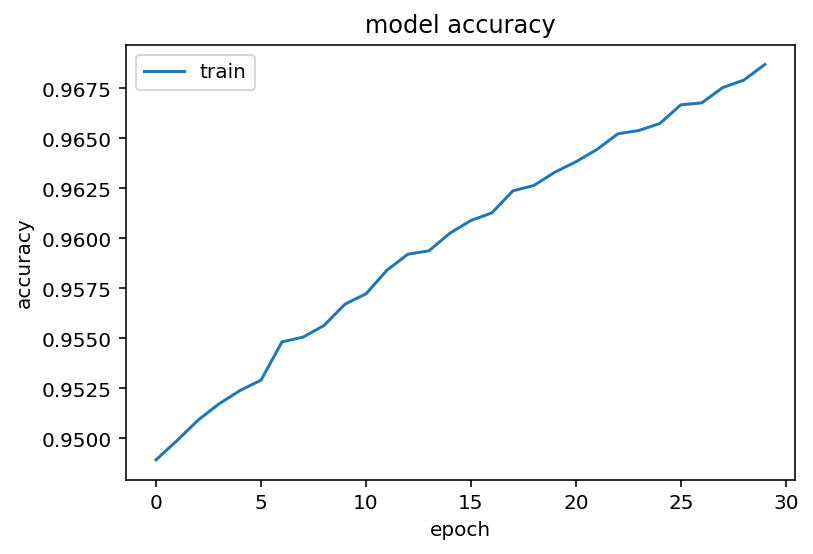

In [13]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['acc'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

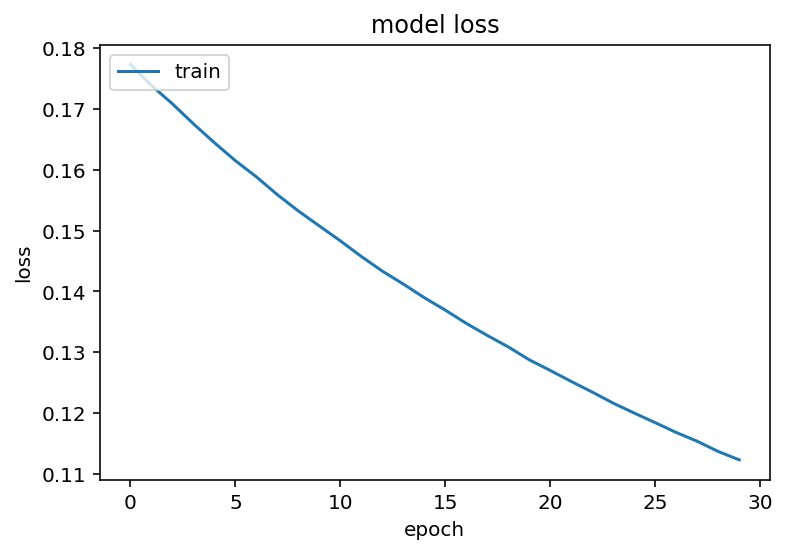

In [14]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

<h3>Step 9: Test a Case</h3>

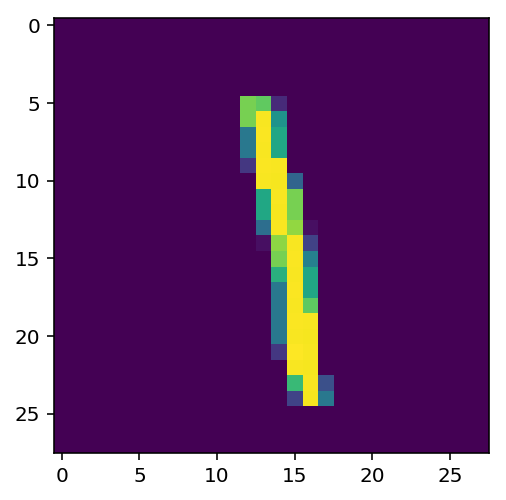

In [15]:
sample = test_x[31]                      #pull a case from test set
sample = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample)                       #display the image


In [16]:
sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)       #based on the pixel values, predict the number
print("Class: ",prediction)                      #print the prediction

Class:  [1]


In [17]:
#display probabilty of each possible number
(model.predict(sample))

array([[1.1900995e-04, 9.5521277e-01, 3.5832641e-03, 1.6126428e-02,
        4.1978667e-04, 3.3336144e-03, 1.5716244e-03, 7.6523121e-03,
        9.0646250e-03, 2.9164378e-03]], dtype=float32)


 
<div style="text-align: center;"><img src="./coding hive logo med with text.png" height="60" width="47" />

<div>2019